### This notebook contains a plot for the readme file that needs to be saved.

#### Import lib like pandas, numpy, matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import data from csv

In [2]:
df = pd.read_csv('data/raw.csv')

#### create columns total score & average

In [3]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [4]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


##### This code creates a histogram with Seaborn to show the 'average' column's distribution in the DataFrame `df`, colored by 'lunch', and saves it as 'lunch_histogram_plot.png'.

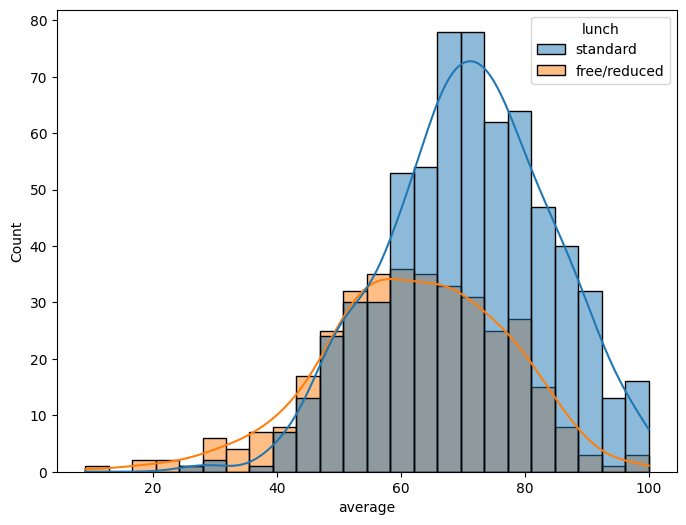

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/lunch_histogram_plot.png')


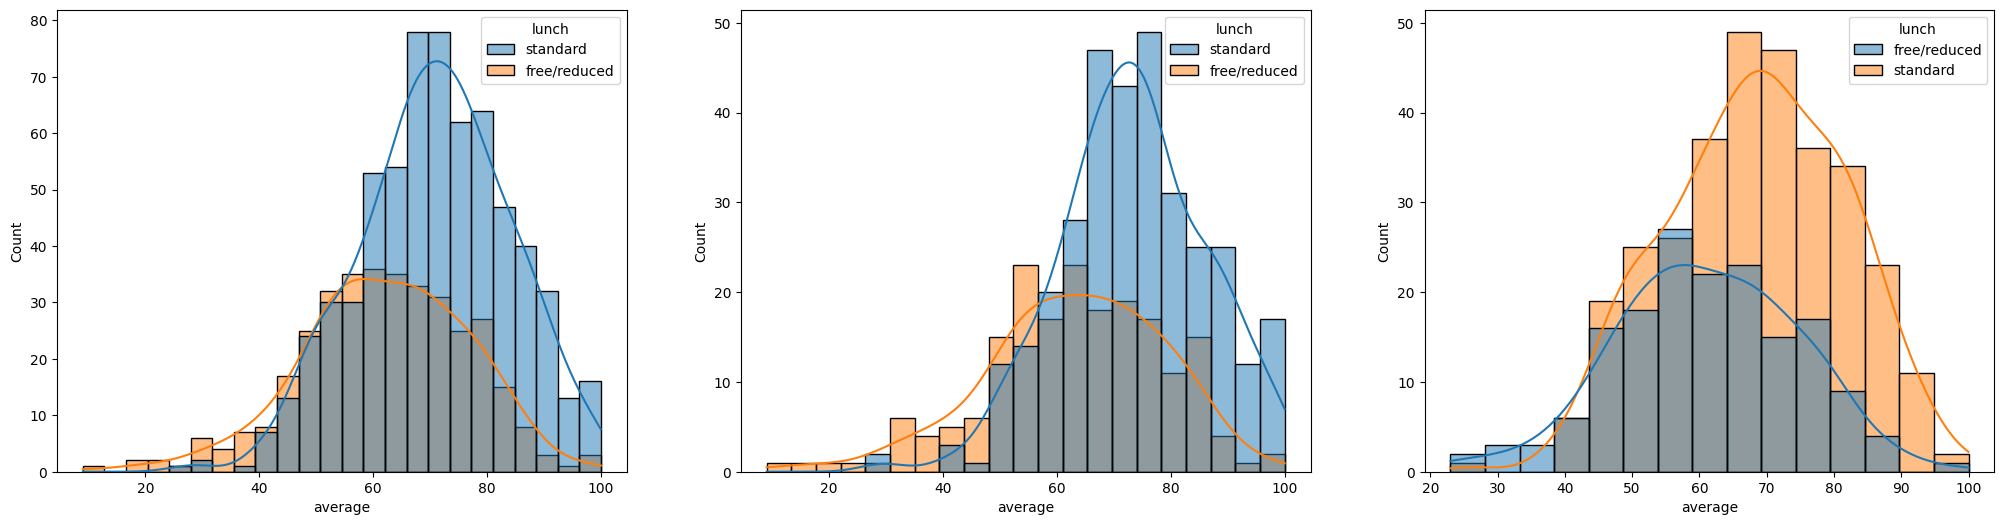

In [16]:


plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/lunch_02.png')
plt.show()

#### This code creates three subplots side by side using Seaborn to visualize the distribution of the 'average' column in the DataFrame `df` with respect to 'parental_level_of_education', split by gender. The resulting plot is saved as 'parent_edu.png'.

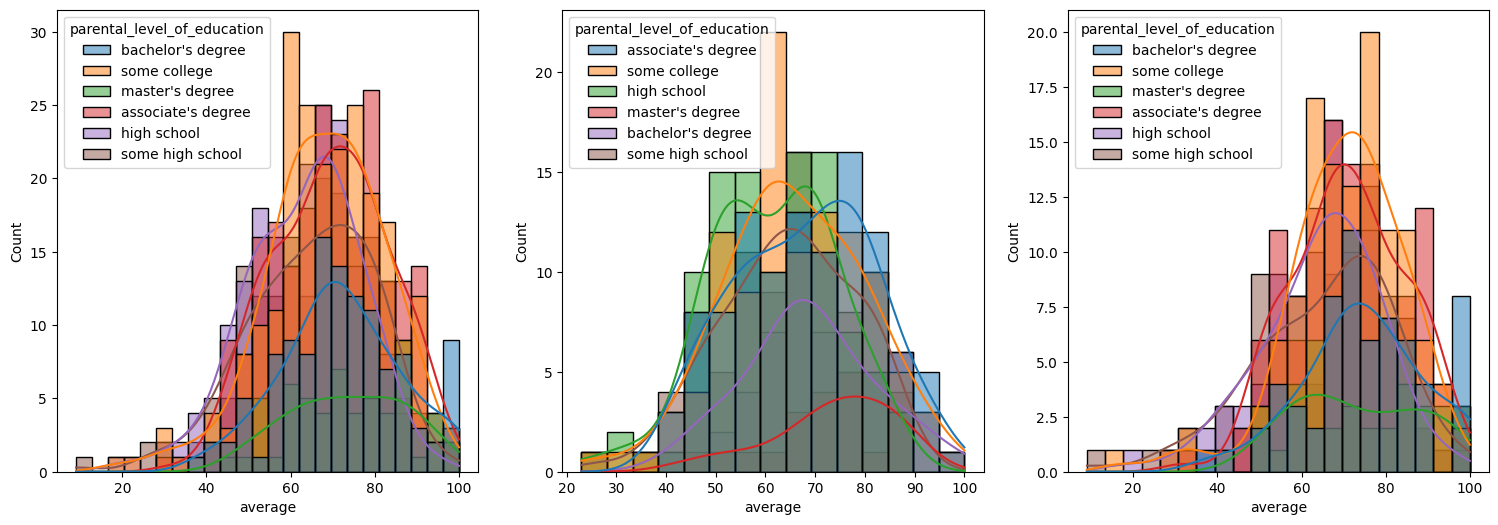

In [6]:
plt.figure(figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/parent_edu.png')
plt.show()


#### This code creates a figure with two subplots using Seaborn and Matplotlib. The first subplot is a count plot showing the distribution of 'race_ethnicity' in the DataFrame `df`. The second subplot is a pie chart displaying the same information. The resulting plot is saved as 'race_ethnicity_01.png'.

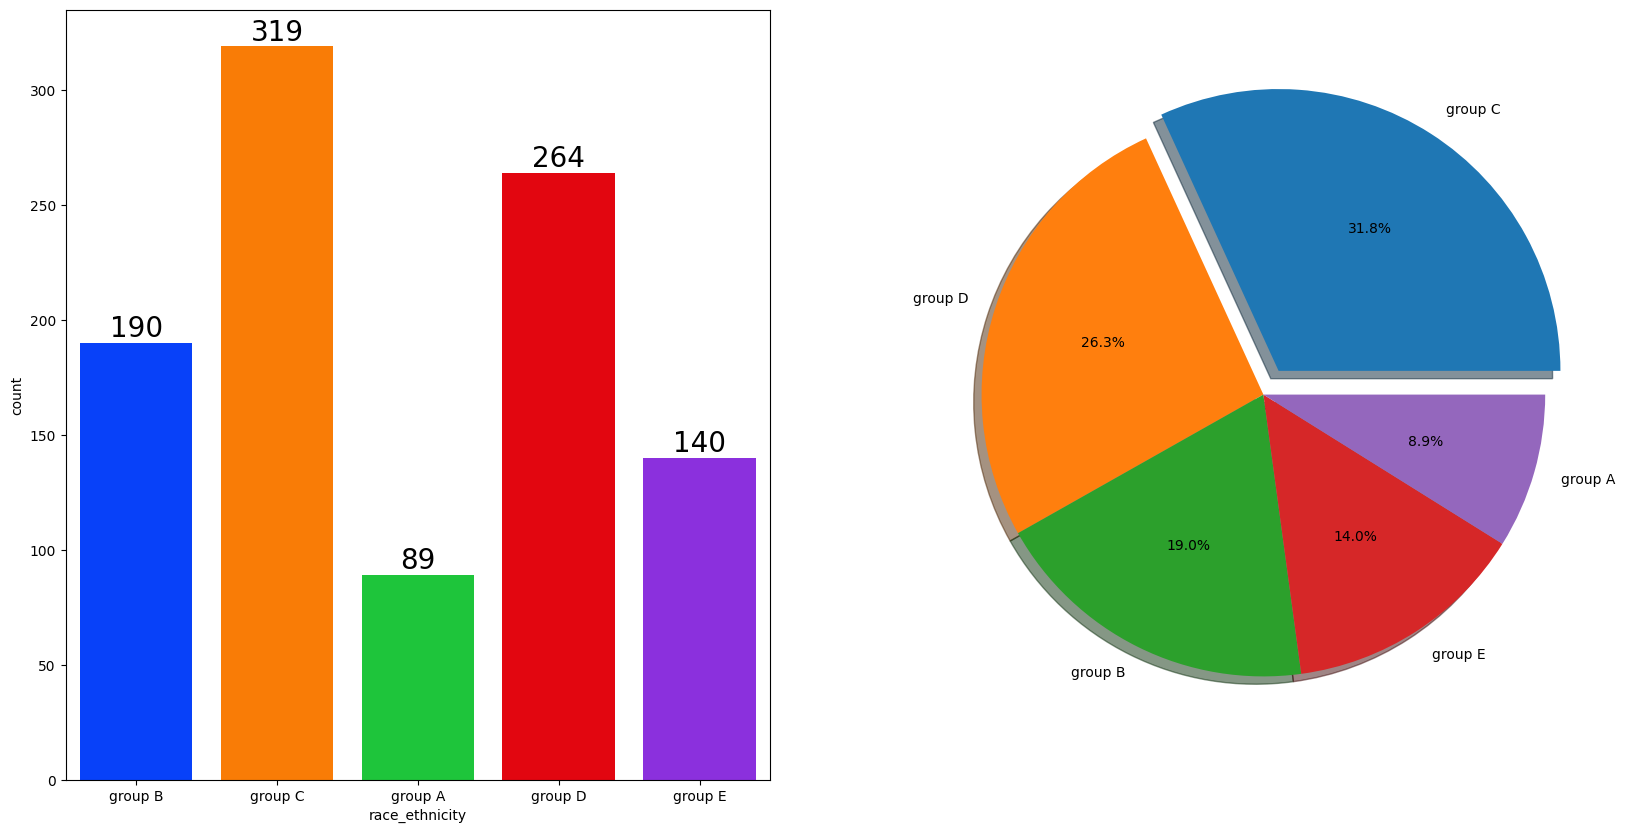

In [7]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True)
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/race_ethnicity_01.png')
plt.show()


#### This code creates three bar plots using Seaborn to visualize the average math, reading, and writing scores of students grouped by 'race_ethnicity' in the DataFrame `df`. The plots are saved as 'race_ethnicity_02.png'.

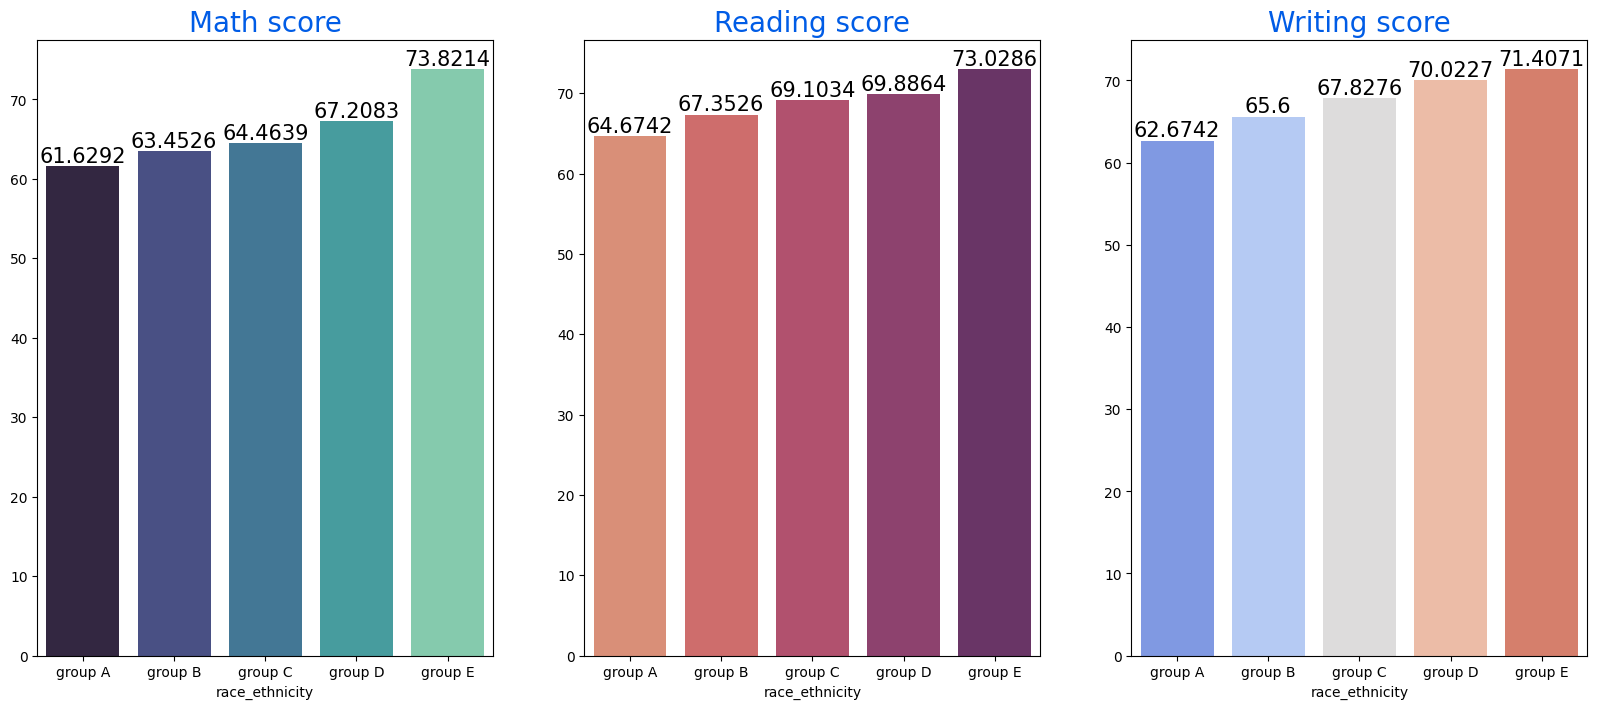

In [8]:
Group_data2 = df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/race_ethnicity_02.png')
plt.show()


#### This code creates two count plots using Seaborn to visualize the number of students with different levels of parental education, grouped by test preparation course and lunch status. The plots are saved as 'lunch_01.png'.


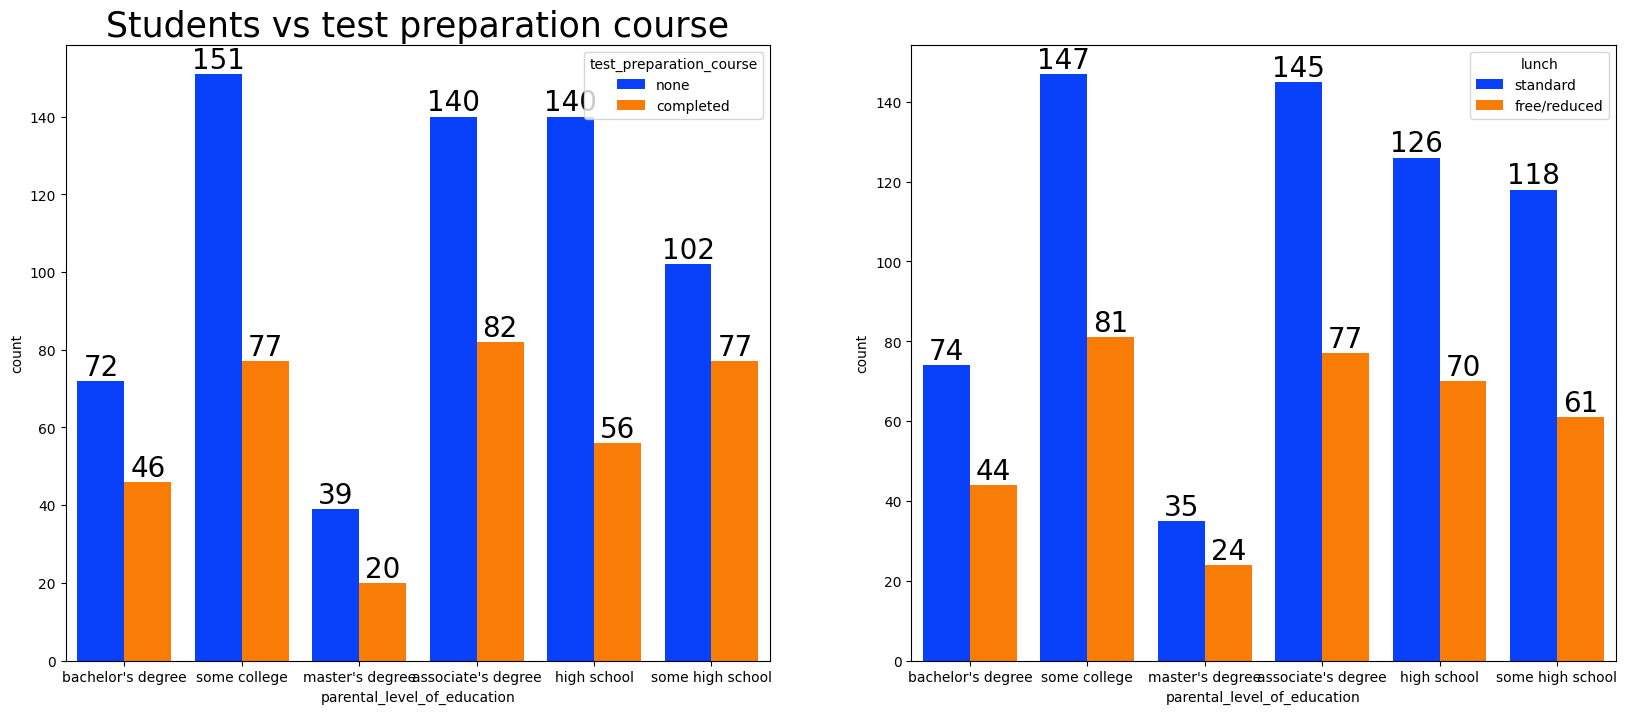

In [9]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='test_preparation_course', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course', color='black', size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

sns.countplot(x=df['parental_level_of_education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/lunch_01.png')
plt.show()


#### This code creates a figure with three subplots using Seaborn to visualize the average scores in math, reading, and writing for students based on their lunch and test preparation course. The resulting plot is saved as 'test_prep_01.png'.

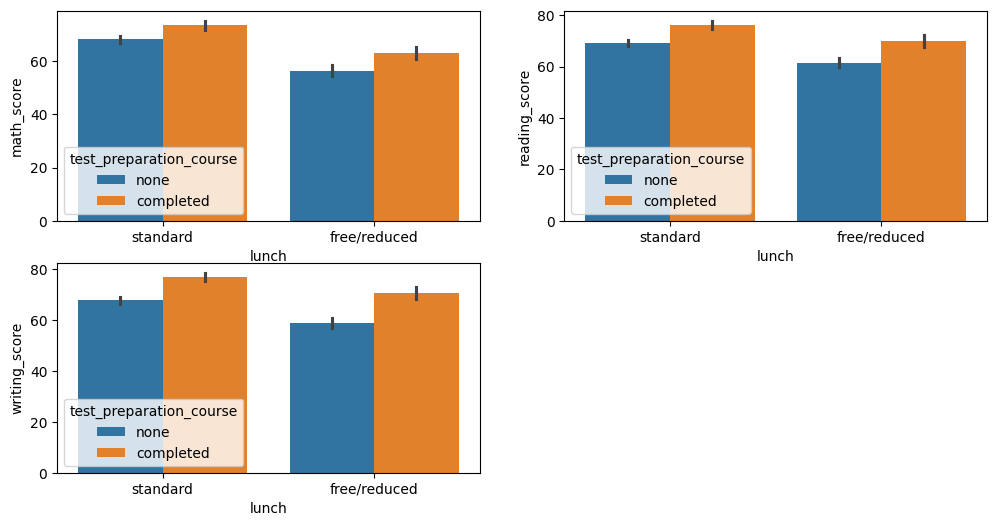

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/test_prep_01.png')
plt.show()


#### This code uses Seaborn to create a pairplot of the DataFrame `df`, with the data points colored by gender. The pairplot is saved as 'pair_plot.png'.

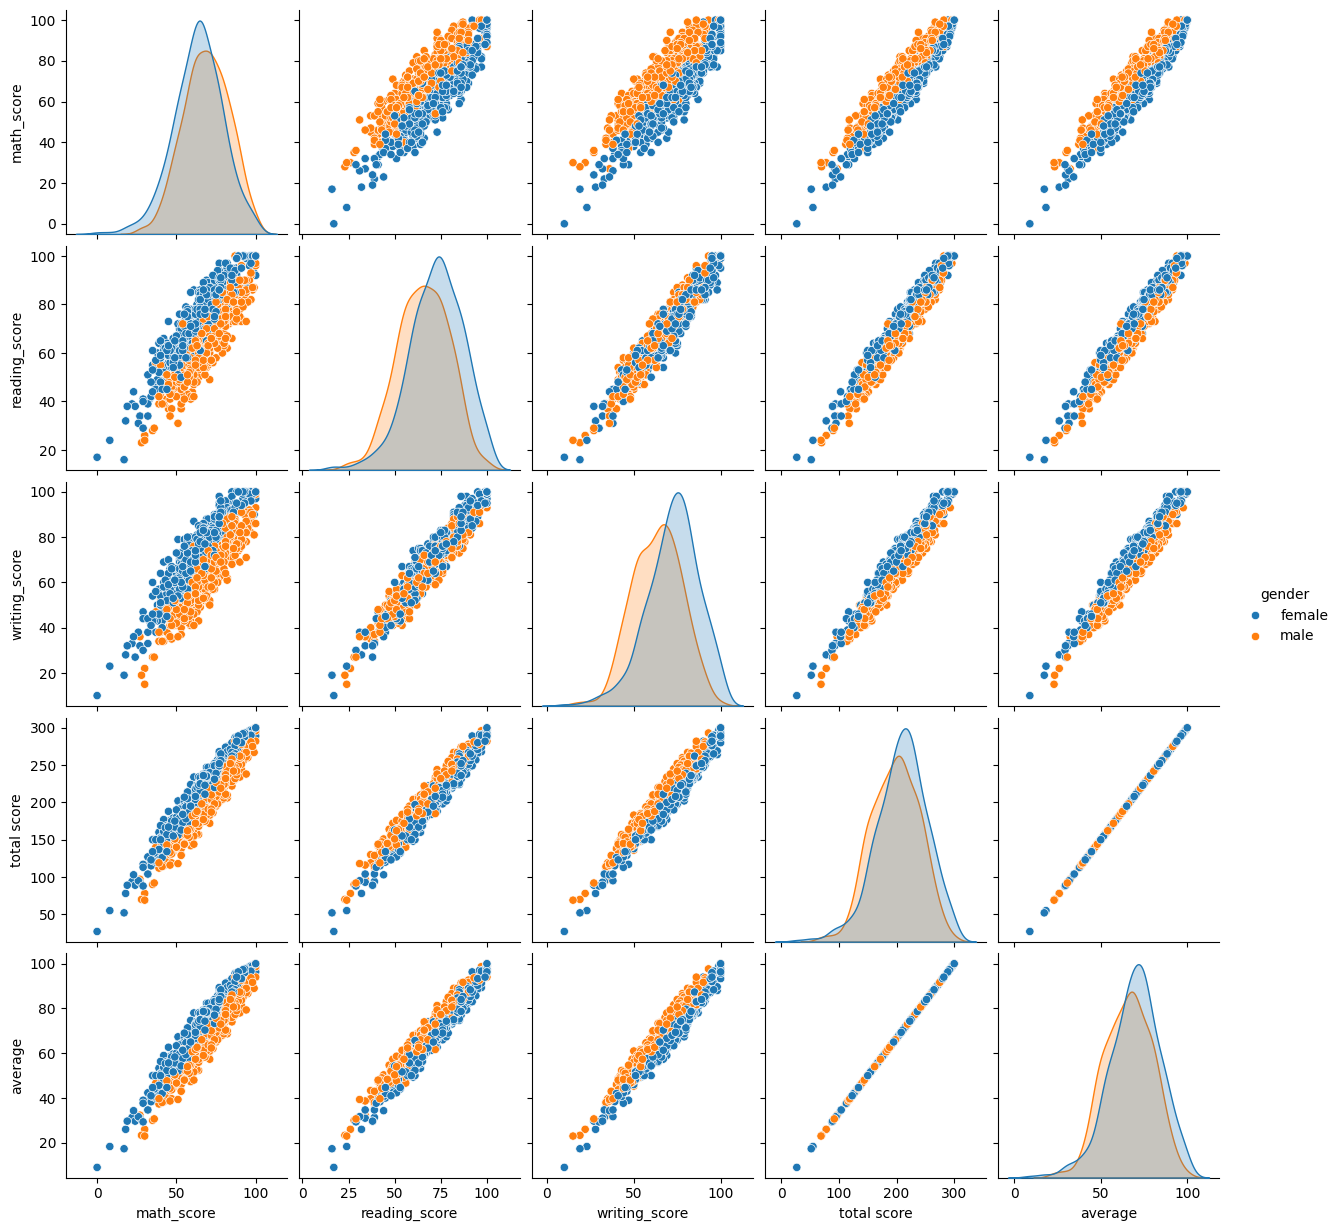

In [11]:
sns.pairplot(df, hue='gender')
plt.savefig('/home/ams/Documents/python/vscode/Hindi/Images/pair_plot.png')
plt.show()


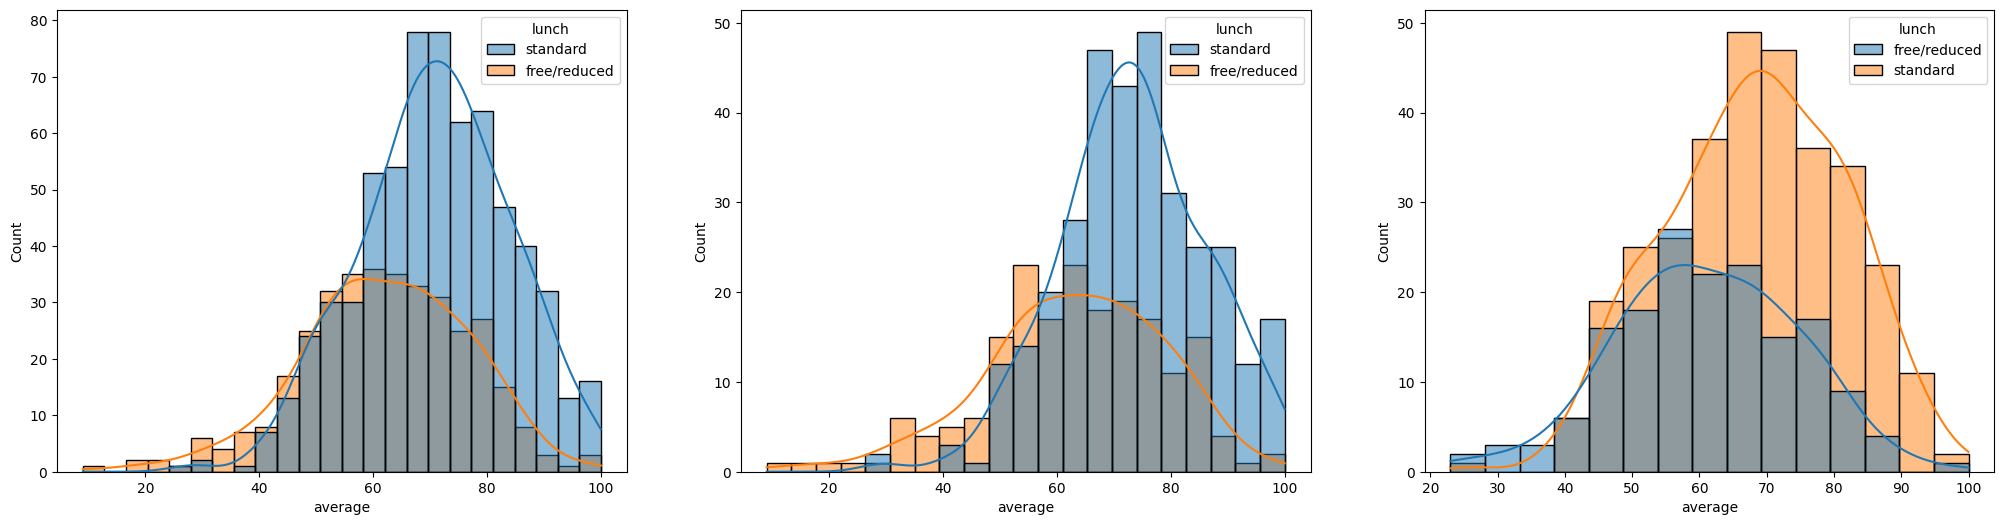